## **Lab 05 - Feedforward Neural Network**

##### Paige Rosynek - 10.5.2022

### **Intoduction**

The goal of this lab is to explore simple neural networks using sklearn's MLPClassifier to build multi-layer perceptron models. In this lab, we will be using the Iris data set and creating a simple network with one hidden layer that contains 4 neurons. Each neuron implements a linear model whose output is processed by an activation function, in the case of this lab we will be using ReLU as the activation function for the hidden layer neurons. The input layer has two neruons for each the two features of the feature matrix and the output layer contains a single nueron. The first part of the lab involves training an MLPClassifier on the length/width pairs of features for the petals and sepals features, we then can visualize the planes learned by these models to see how well they can separate the classes. We will then use heat maps to visualize the decision boundaries learned from the planes and activation function. Lastly, we will train a logistic regression model on the original feature matrix and a transformed feature matrix with double the amount of features. 

### **Questions**

##### **Problem 1**

##### 1. What do the parameters to the MLPClassifier class mean?

The first parameter of the MLPClassifier, hidden_layer_sizes, specifies the size (number of neurons) of each hidden layer in the network; in our case we had a hidden_layer_size of 4. The next parameter, max_iter, specifies the maximum number of iterations to train the model if the model hasn't converged by then. Lastly, the parameter, solver, specifies the solver for weight optimization; we used 'lbfgs' which is an optimizer in the family of quasi-Newton methods.

##### 2. Draw the network

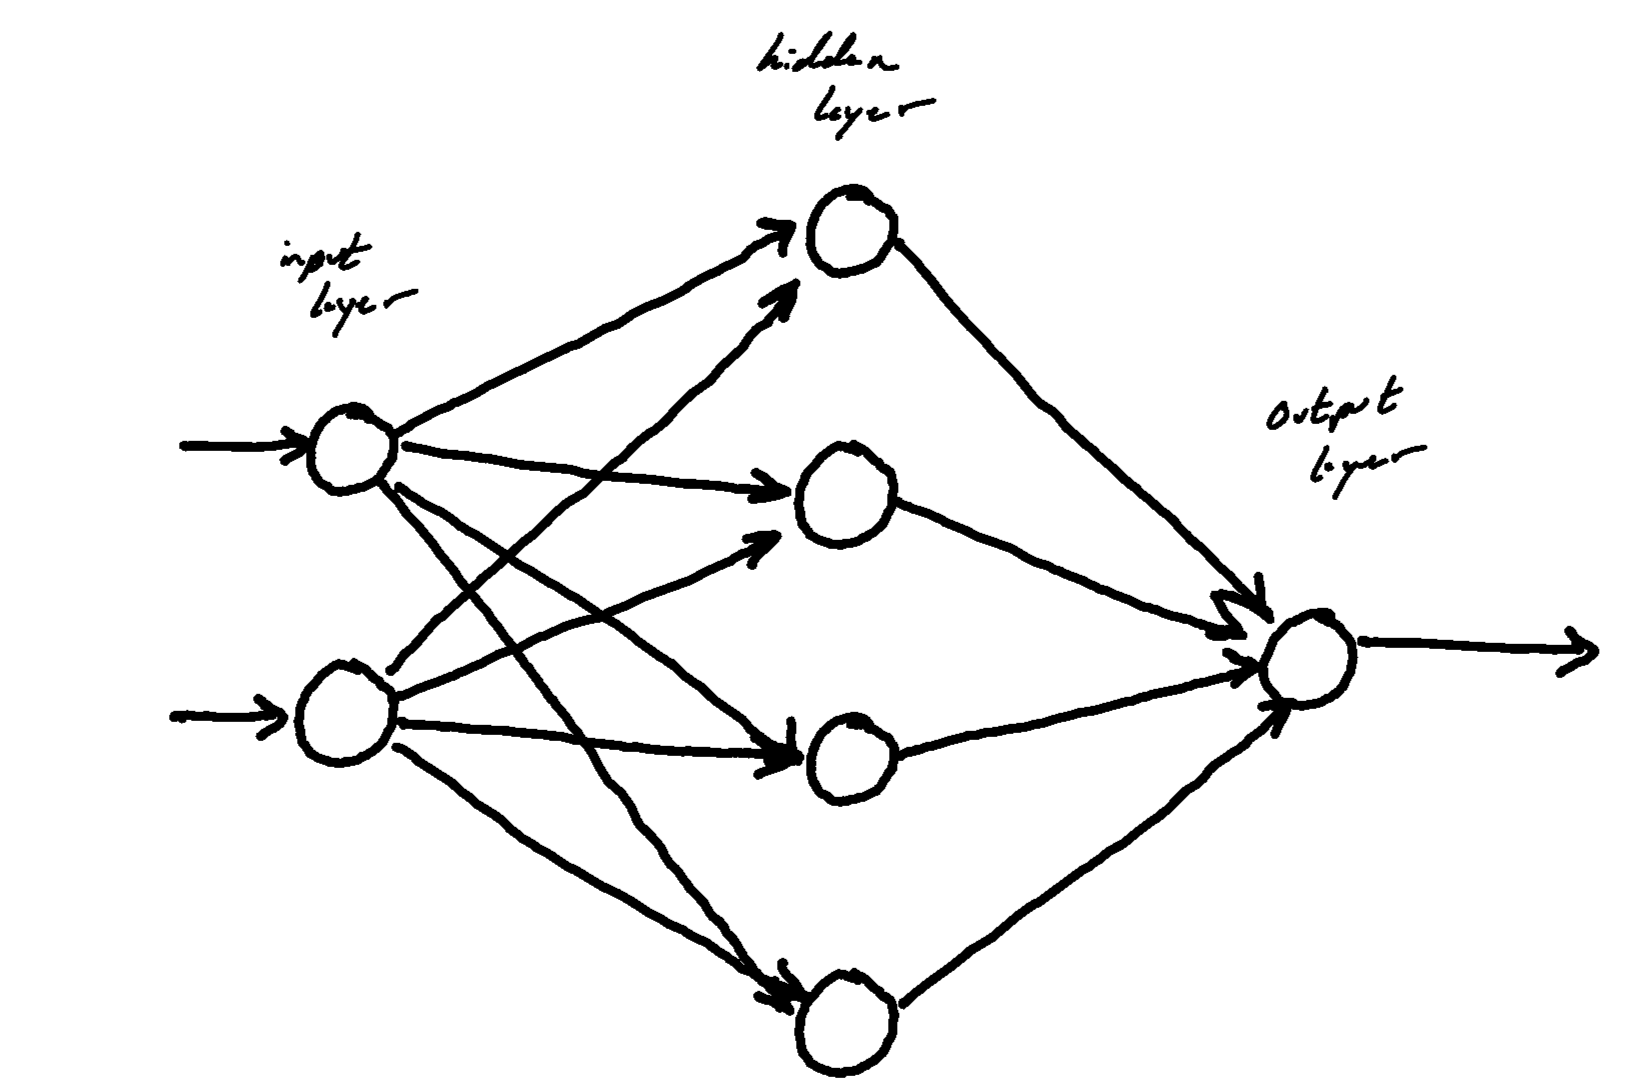

In [271]:
from IPython.display import Image
Image(filename='../q1-2.PNG')

##### 3. What activation functions are used for each node?

The activation function used for each node is ReLu, which is the default for the MLPClassifier.

##### **Problem 2**

##### 1. What are the dimensions of mlp_petals.coefs_[0] and mlp_petals.intercepts_[0]? Where do those dimensions come from?

The shape of mlp_petals.coefs_[0] is (2,4) and the shape of mlp_petals.intercepts_[0] is (4,1). These dimensions come from the structure of the network. There are 2 input features for each of the 4 neurons in the hidden layer. Then the results of the 4 hidden neurons get fed into an activation function (ReLu) to predict a single class.

##### 2. What are the dimensions of mlp_petals_models? What do the dimensions correspond to?

The dimensions of mlp_petals_models is (4,3), where mlp_petals_models is a stack of of the matricies in the previous question. The numpy function vstack takes the (1,4) matrix and the (2,4) matrix row-wise to produce a matrix that is (3,4), which is then transposed to get the final shape of (4,3). The dimensions correspond to the number of nuerons in the hidden layer, 4, and the number of weights each neuron has to compute which is 3 (B0, B1, B2).

##### 3. Comment on the abilities of the lines to separate setosa vs the rest, versicolor vs the rest, and virginica vs the rest with petal features.

By inspection of the petal length and width plots, it can be seen that the plane from hidden layer 4 does the best job separating setosa from the rest. For the reamining two classes, versicolor and virginica, the model does a poor job separating either of these classes from the rest; none of the planes separate these classes well.

##### **Problem 3**

##### 1. How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used logistic function as an activation layer instead?

The ReLU function takes any input less than 0 or equal to 0, and makes it 0; with all other positive input remaining the same; output is bounded from 0 to positive infinity. A logistic function is different in that any increasingly negative input has an output close to 0 and any increasingly positive inputs have an output closer to 1; output is bounded between 0 and 1. If we used a logistic function for the activation layer, the heatmap would have smaller regions that are just 0.

##### 2. A neural network consists of different layers and a final classification layer. Which activation function (ReLU or logistic) is more suitable to use for a classification layer? Which activation function is more suitable to use for an inner layer? – You may need to look up this information.

The ReLU function is best suited for the inner layers of the network because it has the ability to turn neurons on/off and it does not have a bound on the output like a logistic function that is bounded between 0 and 1. The logistic function is better suited for the classification layer because it is bounded betwen 0 and 1 and it can be used with thresholds to label the different classes.

##### **Problem 4**

##### 1. How do the confusion matrices and accuracies of the two models compare? Did the transformed features produce a more accurate model? 

The accuracy of the model trained on the original features with 4 columns was 89.3%. The accuracy of the model trained on the transformed feature matrix with 8 columns was 96.7%, so the transformed features produced a more accurate model. The confusion matrix for the 4-features model shows that the model could correctly classify most of the points except it mis-labeled 16 virginica as versicolor. The confusion matrix for the 8-features model shows that the model could correctly predict most of the points while only milabelling 5 total data points.

Disclaimer: These models were tested and trained on the whole data set without a test/train split so the accuracy is not a good representation of the performance of our actual models. 

### **Train Multilayer Perceptron (MLP) Models on Petal & Sepal Features**

##### Import libraries

In [272]:
import neurons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# set random seed to get same results every time
np.random.seed(10)

##### 1. Load Iris Dataset

In [273]:
iris = load_iris()

##### 2. Train a MLP on Petal Height & Width

In [274]:
scaled_X = StandardScaler().fit_transform(iris.data)
mlp_petals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')
mlp_petals.fit(scaled_X[:,2:], iris.target)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')

##### 3. Train MLP on Sepal Height & Width

In [275]:
mlp_sepals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')
mlp_sepals.fit(scaled_X[:, 0:2], iris.target)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')

### **Visualize Planes Learned by Individual Neurons**

##### 1. Extract Weight Vectors for Hidden Layers

In [276]:
mlp_petals_models = np.vstack([mlp_petals.intercepts_[0], mlp_petals.coefs_[0]]).T
mlp_sepals_models = np.vstack([mlp_sepals.intercepts_[0], mlp_sepals.coefs_[0]]).T

##### 2. Solve the equation for $x_2$ : $0 = B_0 + B_1x_1 + B_2x_2$

Equation :

$x_2 = -\frac{1}{B_2} (B_0 + B_1x_1)$

##### 3. Plot Features & Planes of Neurons in Hidden Layer

In [277]:
def x2 (B0, B1, B2, x1):
    return (-1/B2) * (B0 + B1 * x1)

Plot for petal length/width

['setosa' 'versicolor' 'virginica']


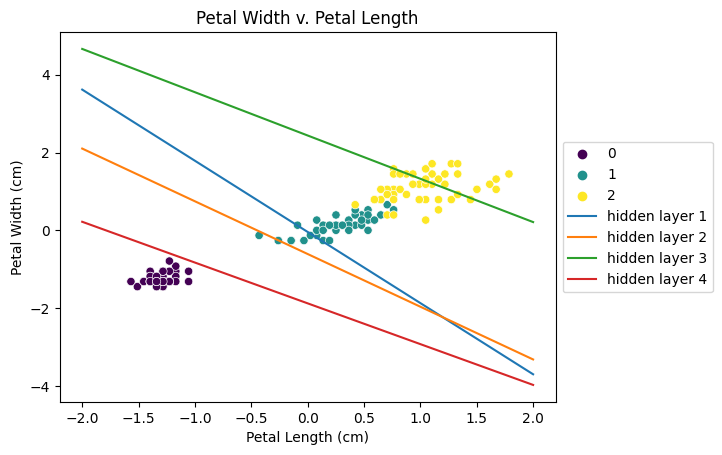

In [278]:
x1 = np.linspace(-2,2,100)

fig, ax = plt.subplots()

sns.scatterplot(x=scaled_X[:,2], y=scaled_X[:,3], hue=iris.target, palette='viridis')
#ax.scatter(scaled_X[:,2], scaled_X[:,3], c=iris.target)
ax.plot(x1, x2(mlp_petals_models[0,0], mlp_petals_models[0,1], mlp_petals_models[0,2], x1), label='hidden layer 1')
ax.plot(x1, x2(mlp_petals_models[1,0], mlp_petals_models[1,1], mlp_petals_models[1,2], x1), label='hidden layer 2')
ax.plot(x1, x2(mlp_petals_models[2,0], mlp_petals_models[2,1], mlp_petals_models[2,2], x1), label='hidden layer 3')
ax.plot(x1, x2(mlp_petals_models[3,0], mlp_petals_models[3,1], mlp_petals_models[3,2], x1), label='hidden layer 4')
ax.set_title('Petal Width v. Petal Length')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
print(iris.target_names)

Plot for Sepal Length/Width

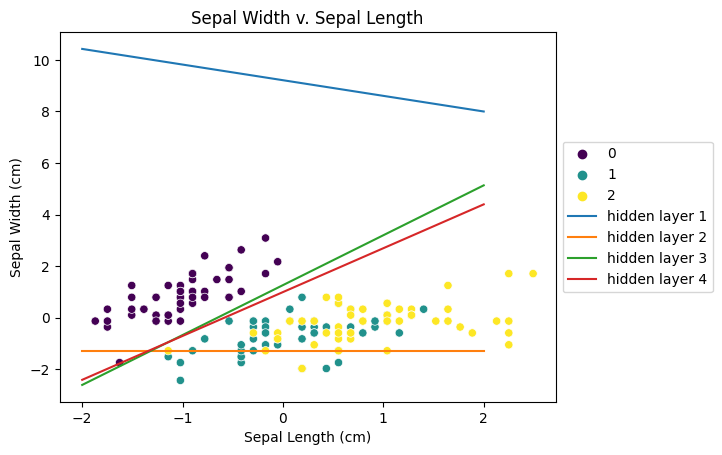

In [279]:
fig, ax = plt.subplots()

sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=iris.target, palette='viridis')
#ax.scatter(scaled_X[:,0], scaled_X[:,1], c=iris.target)
ax.plot(x1, x2(mlp_sepals_models[0,0], mlp_sepals_models[0,1], mlp_sepals_models[0,2], x1), label='hidden layer 1')
ax.plot(x1, x2(mlp_sepals_models[1,0], mlp_sepals_models[1,1], mlp_sepals_models[1,2], x1), label='hidden layer 2')
ax.plot(x1, x2(mlp_sepals_models[2,0], mlp_sepals_models[2,1], mlp_sepals_models[2,2], x1), label='hidden layer 3')
ax.plot(x1, x2(mlp_sepals_models[3,0], mlp_sepals_models[3,1], mlp_sepals_models[3,2], x1), label='hidden layer 4')
ax.set_title('Sepal Width v. Sepal Length')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')

### **Visualize Decision Boundaries Resulting from Planes & ReLU Activation Function**

##### 1. Create a mesh grid in the range [-2, 2] along each dimension

In [280]:
p1 = np.linspace(-2,2,100)
xv, yv = np.meshgrid(p1, p1)

##### 2. Plot the meshgrid as a scatterplot

Text(0, 0.5, 'x2')

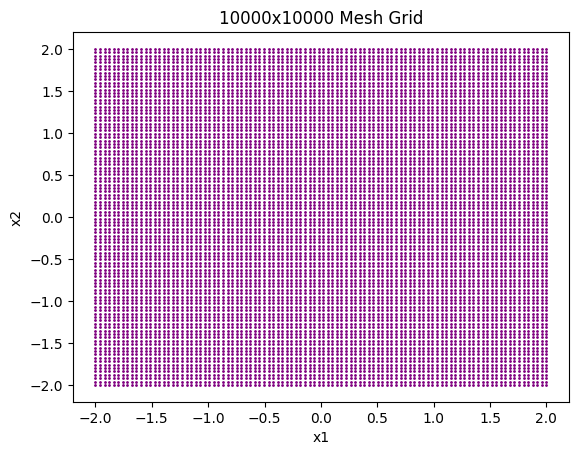

In [281]:
plt.scatter(xv, yv, s=1, color='purple')
plt.title('10000x10000 Mesh Grid')
plt.xlabel('x1')
plt.ylabel('x2')

##### 3. Calculate the value for the first hidden layer neuron at each grid point (for petals)

In [282]:
X = np.hstack((xv.reshape(10000,1), yv.reshape(10000,1)))

input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_petals_models[0, :])
pred = p_layer.predict(X)

##### 4. Plot the model outputs as a heatmap or contourf plot

1st Neuron

<AxesSubplot:>

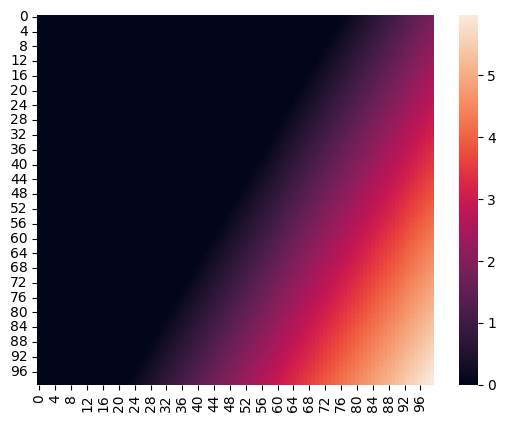

In [283]:
pred = pred.reshape(100,100)
sns.heatmap(pred)

##### 5. Repeat for the remaining 3 neurons in the hidden layer

2nd Neuron

<AxesSubplot:>

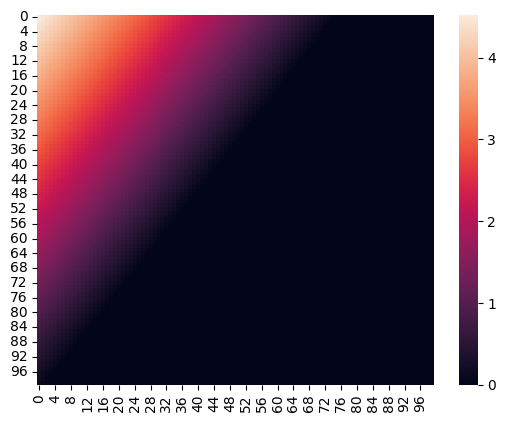

In [284]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_petals_models[1, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

3rd Neuron

<AxesSubplot:>

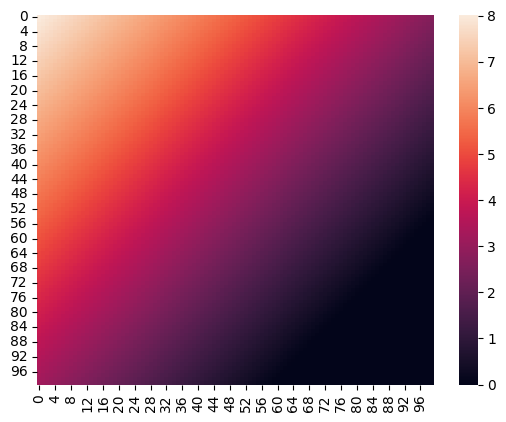

In [285]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_petals_models[2, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

4th Neuron

<AxesSubplot:>

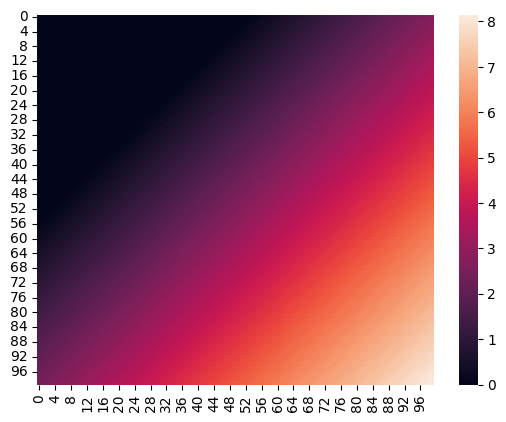

In [286]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_petals_models[3, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

##### 6. Repeat this process for the hidden layer of the sepals model

1st Neuron

<AxesSubplot:>

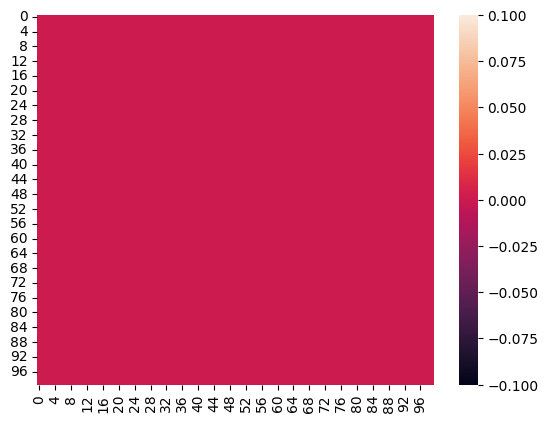

In [287]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_sepals_models[0, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

2nd Neuron

<AxesSubplot:>

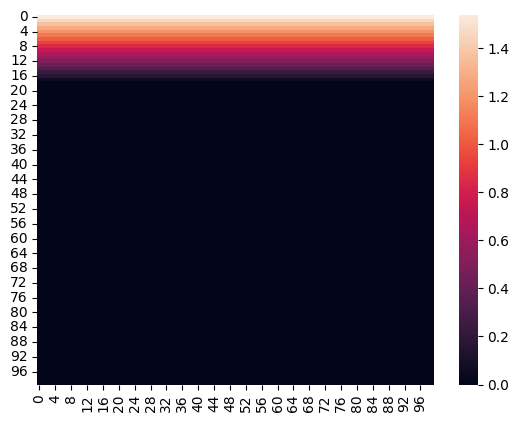

In [288]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_sepals_models[1, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

3rd Neuron

<AxesSubplot:>

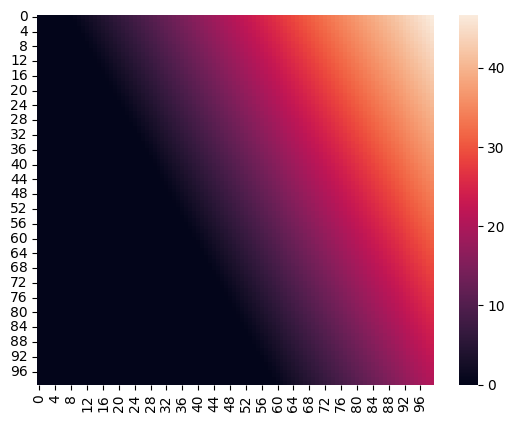

In [289]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_sepals_models[2, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

4th Neuron

<AxesSubplot:>

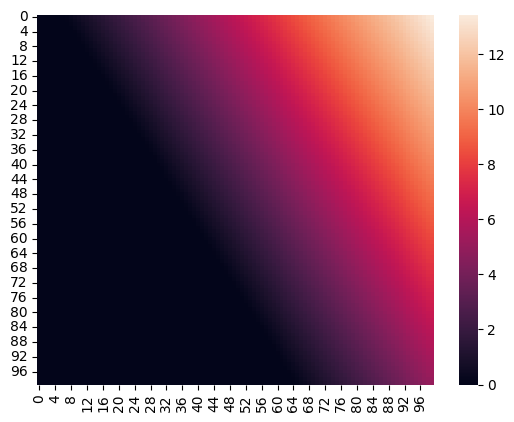

In [290]:
input = neurons.Input()
p_layer = neurons.Neuron([input], mlp_sepals_models[3, :])
pred = p_layer.predict(X).reshape(100,100)

sns.heatmap(pred)

### **Train Logistic Regression Models on Transformed & Original Features**

##### 1. Use the Input, Neuron, & HStack classes with the weights from the MLP model to recreate the hidden layer

In [291]:
input = neurons.Input()
p_layer_1 = neurons.Neuron([input], mlp_petals_models[0,:])
p_layer_2 = neurons.Neuron([input], mlp_petals_models[1,:])
p_layer_3 = neurons.Neuron([input], mlp_petals_models[2,:])
p_layer_4 = neurons.Neuron([input], mlp_petals_models[3,:])

stacked = neurons.HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

##### 2. Predict the transformed values to create a transformed feature matrix

In [292]:
transformed_petals_X = stacked.predict(scaled_X[:,2:])

##### 3. Repeat for the sepal MLP model

In [293]:
input = neurons.Input()
p_layer_1 = neurons.Neuron([input], mlp_sepals_models[0,:])
p_layer_2 = neurons.Neuron([input], mlp_sepals_models[1,:])
p_layer_3 = neurons.Neuron([input], mlp_sepals_models[2,:])
p_layer_4 = neurons.Neuron([input], mlp_sepals_models[3,:])

stacked = neurons.HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])
transformed_sepals_X = stacked.predict(scaled_X[:,0:2])

##### 4. Combine the 2 tranformed feature matricies into new feature matrix with 8 columns

In [294]:
transformed_feature_matrix = np.hstack((transformed_petals_X, transformed_sepals_X))

##### 5. Train 2 LR models using SGDClassifier(loss='log') - one on the original 4 features & one on the new transformed feature matrix with 8 columns

In [295]:
# original 4 features
sgd_4feat = SGDClassifier(loss='log_loss')
sgd_4feat.fit(scaled_X, iris.target)

SGDClassifier(loss='log_loss')

In [296]:
# transformed feature matrix (8 features)
sgd_8feat = SGDClassifier(loss='log_loss')
sgd_8feat.fit(transformed_feature_matrix, iris.target)

SGDClassifier(loss='log_loss')

##### 6. Evaluate the 2 models using accuracy & confusion matricies

accuracy for 4 column original feature matrix = 0.8933333333333333
accuracy for 8 column transformed feature matrix = 0.9666666666666667


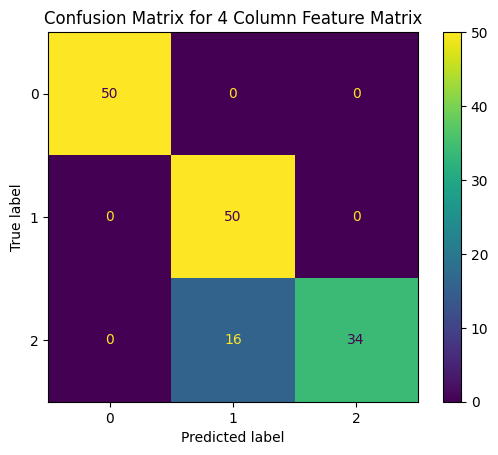

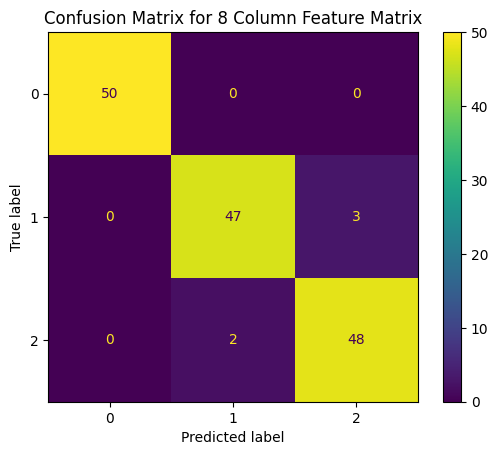

In [297]:
prediction4 = sgd_4feat.predict(scaled_X)
prediction8 = sgd_8feat.predict(transformed_feature_matrix)

accuracy_4feat = accuracy_score(iris.target, prediction4)
accuracy_8feat = accuracy_score(iris.target, prediction8)

confusion_matrix4 = confusion_matrix(iris.target, prediction4)
cm4 = ConfusionMatrixDisplay(confusion_matrix4)
cm4.plot()
plt.title('Confusion Matrix for 4 Column Feature Matrix')

confusion_matrix8 = confusion_matrix(iris.target, prediction8)
cm8 = ConfusionMatrixDisplay(confusion_matrix8)
cm8.plot()
plt.title('Confusion Matrix for 8 Column Feature Matrix')

print('accuracy for 4 column original feature matrix = {}'.format(accuracy_4feat))
print('accuracy for 8 column transformed feature matrix = {}'.format(accuracy_8feat))